In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

# read in streamflow and start/stop dates

In [14]:
streamflow_file = 'Hanalei_stream_16103000_HAWAII-TIME.csv'
start_date = '2013-03-25'
end_date = '2018-04-18'

# View the streamflow

In [15]:
df = pd.read_csv(streamflow_file)

C:\Users\bgorb\AppData\Local\Temp\ipykernel_26400\428510336.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(streamflow_file)


C:\Users\bgorb\AppData\Local\Temp\ipykernel_26400\4073663630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['datetime'] = pd.to_datetime(filtered_df['datetime'])


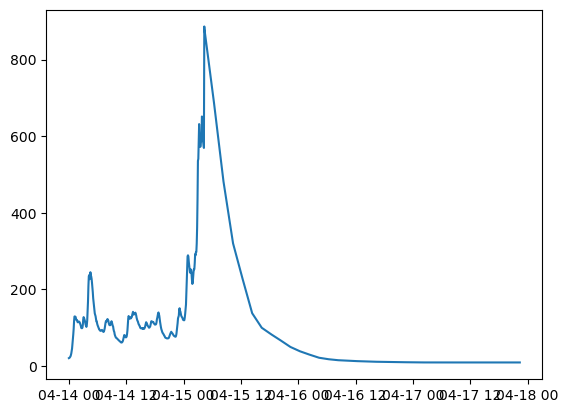

In [16]:
filtered_df = df.loc[(df['datetime'] >= start_date) & (df['datetime'] < end_date)]
filtered_df['datetime'] = pd.to_datetime(filtered_df['datetime'])

plt.plot(filtered_df.datetime, filtered_df['metric_discharge_cms'])

In [17]:
filtered_df

Unnamed: 0.1            datetime  Unnamed: 0  00060 00060_cd  \
699769        699769 2018-04-14 00:00:00      699769  718.0        A   
699770        699770 2018-04-14 00:05:00      699770  737.0        A   
699771        699771 2018-04-14 00:10:00      699771  767.0        A   
699772        699772 2018-04-14 00:15:00      699772  817.0        A   
699773        699773 2018-04-14 00:20:00      699773  883.0        A   
...              ...                 ...         ...    ...      ...   
700126        700126 2018-04-17 14:21:00      700126  320.0     A, e   
700127        700127 2018-04-17 16:21:00      700127  320.0     A, e   
700128        700128 2018-04-17 18:21:00      700128  320.0     A, e   
700129        700129 2018-04-17 20:21:00      700129  320.0     A, e   
700130        700130 2018-04-17 22:21:00      700130  320.0     A, e   

         site_no  00065 00065_cd  metric_discharge_cms  metric_height_m  
699769  16103000   3.91        A             20.331496         1.191768  
699770  16103000   3.93        A             20.869516         1.197864  
699771  16103000   3.96        A             21.719021         1.207008  
699772  16103000   4.01        A             23.134864         1.222248  
699773  16103000   4.08        A             25.003776         1.243584  
...          ...    ...      ...                   ...              ...  
700126  16103000    NaN      NaN              9.061391              NaN  
700127  16103000    NaN      NaN              9.061391              NaN  
700128  16103000    NaN      NaN              9.061391              NaN  
700129  16103000    NaN      NaN              9.061391              NaN  
700130  16103000    NaN      NaN              9.061391              NaN  

[362 rows x 10 columns]

In [18]:
# extra stuff for changing to datetime
# filtered_df['Haw_datetime'] = np.nan
# Hawaii_time = timezone(timedelta(hours = -10, minutes = 0))
# for i in range(len(filtered_df)):
#     filtered_df['Haw_datetime'][i] = filtered_df['datetime'][i].astimezone(Hawaii_time)
    
# filtered_df = filtered_df.set_index('Haw_datetime')
# filtered_df.index = pd.to_datetime(filtered_df.index)
# filtered_df.index = filtered_df.index.tz_localize(None) 

# Get the right minutes for GSSHA discharge forcing input

In [19]:
def get_minute_acc(streamflow_file, start_date, end_date):
    
    #read in the raw streamflow file (ALREADY CONVERTED TO HAWAII TIME)
    raw_str = pd.read_csv(streamflow_file)
    raw_str['datetime'] = pd.to_datetime(raw_str['datetime'])
    
    #filter the streamflow file to the dates you want
    filtered_str = raw_str.loc[(raw_str['datetime'] >= start_date) & (raw_str['datetime'] <= end_date)]
    filtered_str = filtered_str.reset_index()
    filtered_str['datetime'] = pd.to_datetime(filtered_str['datetime'])
    filtered_str = filtered_str.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'index']) #delete the nonsense
    
    #calculated the minutes between different measurements
    filtered_str['minutes'] = np.nan
    for i in range(len(filtered_str)):
        if i == 0:
            filtered_str['minutes'][i] = 0
        else:
            filtered_str['minutes'][i] = (filtered_str['datetime'][i] - filtered_str['datetime'][i-1]).total_seconds()/60
    
    #accumulate the time to get the minutes for GSSHA input
    filtered_str['accumulated_minutes'] = np.nan
    for i in range(len(filtered_str)):
        if i == 0:
            filtered_str['accumulated_minutes'][i] = 0
        else:
            filtered_str['accumulated_minutes'][i] = filtered_str['minutes'][0:i+1].sum()
    
    return filtered_str

In [20]:
str_data = get_minute_acc(streamflow_file, start_date, end_date)

C:\Users\bgorb\AppData\Local\Temp\ipykernel_26400\4099467562.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_str = pd.read_csv(streamflow_file)
C:\Users\bgorb\AppData\Local\Temp\ipykernel_26400\4099467562.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_str['minutes'][i] = 0
C:\Users\bgorb\AppData\Local\Temp\ipykernel_26400\4099467562.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_str['minutes'][i] = (filtered_str['datetime'][i] - filtered_str['datetime'][i-1]).total_seconds()/60
C:\Users\bgorb\AppData\Local\Temp\ipykernel_26400

In [21]:
str_data.to_csv('april2018_streamflow_forcing.csv')